In [1]:
import pandas as pd
import numpy as np
import requests
import random
import math
import matplotlib.pyplot as plt

In [712]:
NHL_BASE_URL = "http://statsapi.web.nhl.com"


"""
PLAY-OFF GAMES CODES
==============================================================================
2015 | 03 | 04 | 12 

2015 = season code, first year of the season (e.g., 2015 is for the 2015-16 seasons)
03   = game type code; 1 = preseason, 2 = regular season; 3 = playoffs
04   = playoff only: round number (1st round = 1, 2nd round = 2, ECF/WCF = 3, SCF = 4)
1    = series number: 1-8 in round 1, 1-4 in round 2, 1-2 in round 3, 1 in round 4
2    = game number: 1-7 for any given series
==============================================================================

REGULAR SEASON / PRE SEASON GAMES CODES
==============================================================================
2015 | 02 | 0807
2015 = season code, first year of the season (e.g., 2015 is for the 2015-16 seasons)
02   = game type code; 1 = preseason, 2 = regular season; 3 = playoffs
0807 = game ID; generally 1-1230 in a normal regular season, but sometimes games will be missing 
       (e.g., games cancelled due to weather) and sometimes games will be added on the end, starting
        with 1231 (e.g., make-up games for weather-cancelled games). Numbers are usually approx. 
        1-130ish in the pre-season, but it can be arbitrary.
==============================================================================
"""
years = range(2005, 2006)
game_types = [3]
game_id_preseason = range(1, 140)
game_id_season = range(0, 1300)
cap_break = 1500*18

games_code_list = []
for year in years:
    for game_type in game_types:
        if game_type == 1:
            for game_id in game_id_preseason:
                games_code_list.append("{0}{1:02d}{2:04d}".format(year, game_type, game_id))
        elif game_type == 2:
            for game_id in game_id_season:
                games_code_list.append("{0}{1:02d}{2:04d}".format(year, game_type, game_id))
        elif game_type == 3:
            # 2015 | 03 | 04 | 12
            for playoff in range(1, 5):
                for series in range(1, 9):
                    for game in range(1, 8):
                        games_code_list.append("{0}{1:02d}{2:02d}{3}{4}".format(year, game_type, playoff, series, game))
#print(games_code_list)

game_list = []
error_count = 0

for idx, game_code in enumerate(games_code_list):
    nhl_game_url = "{0}/api/v1/game/{1}/feed/live".format(NHL_BASE_URL, game_code)
    r = requests.get(nhl_game_url)

    print("{0}/{1} - {2}".format(idx, len(games_code_list),game_code))

    if idx > cap_break:
        break

    if r.status_code == 200:    # valid request
        print("Request {0} Successful".format(nhl_game_url))
        r_json = r.json()
        try:
            game = r_json['gameData']
            #start_time = game['datetime']['dateTime']
            #end_time = game['datetime']['endDateTime']

            away_team = game['teams']['away']
            home_team = game['teams']['home']
            away_team_name = away_team['name']
            home_team_name = home_team['name']

            boxscore = r_json['liveData']['boxscore']
            #offical_id = boxscore['officials'][0]['official']['id']
            official_name1 = boxscore['officials'][0]['official']['fullName']
            official_name2 = boxscore['officials'][1]['official']['fullName']

            away_score = boxscore["teams"]["away"]["teamStats"]["teamSkaterStats"]["goals"]
            home_score = boxscore["teams"]["home"]["teamStats"]["teamSkaterStats"]["goals"]
            if away_score > home_score:
                win = away_team_name
            else:
                win = home_team_name

            row_dict = {"code": game_code,
                        'away_team': away_team_name,
                        'away_score' : away_score,
                        'home_team': home_team_name,
                        "home_score" : home_score,
                        "winner" : win,
                        'official_1': official_name1,
                        "official_2" : official_name2}
            game_list.append(row_dict)
            #print('something')
        except (KeyError, IndexError):
            print("ERROR {0}".format(nhl_game_url))
            error_count += 1
    else:
        print("No Response")

#print(game_df)

game_df = pd.DataFrame(game_list)
game_df = game_df.set_index("code")
game_df1 = game_df[["home_team","home_score","away_team","away_score","official_1","official_2","winner"]]

def loser(row):
    if row["winner"] == row["away_team"]:
        return row["home_team"]
    return row["away_team"]
    

game_df1["loser"] = game_df1.apply(loser, axis=1)

game_df1.to_csv("2005_playoff_data.csv")

0/224 - 2005030111
Request http://statsapi.web.nhl.com/api/v1/game/2005030111/feed/live Successful
1/224 - 2005030112
Request http://statsapi.web.nhl.com/api/v1/game/2005030112/feed/live Successful
2/224 - 2005030113
Request http://statsapi.web.nhl.com/api/v1/game/2005030113/feed/live Successful
3/224 - 2005030114
Request http://statsapi.web.nhl.com/api/v1/game/2005030114/feed/live Successful
4/224 - 2005030115
Request http://statsapi.web.nhl.com/api/v1/game/2005030115/feed/live Successful
5/224 - 2005030116
No Response
6/224 - 2005030117
No Response
7/224 - 2005030121
Request http://statsapi.web.nhl.com/api/v1/game/2005030121/feed/live Successful
8/224 - 2005030122
Request http://statsapi.web.nhl.com/api/v1/game/2005030122/feed/live Successful
9/224 - 2005030123
Request http://statsapi.web.nhl.com/api/v1/game/2005030123/feed/live Successful
10/224 - 2005030124
Request http://statsapi.web.nhl.com/api/v1/game/2005030124/feed/live Successful
11/224 - 2005030125
Request http://statsapi.we

116/224 - 2005030315
Request http://statsapi.web.nhl.com/api/v1/game/2005030315/feed/live Successful
117/224 - 2005030316
Request http://statsapi.web.nhl.com/api/v1/game/2005030316/feed/live Successful
118/224 - 2005030317
Request http://statsapi.web.nhl.com/api/v1/game/2005030317/feed/live Successful
119/224 - 2005030321
Request http://statsapi.web.nhl.com/api/v1/game/2005030321/feed/live Successful
120/224 - 2005030322
Request http://statsapi.web.nhl.com/api/v1/game/2005030322/feed/live Successful
121/224 - 2005030323
Request http://statsapi.web.nhl.com/api/v1/game/2005030323/feed/live Successful
122/224 - 2005030324
Request http://statsapi.web.nhl.com/api/v1/game/2005030324/feed/live Successful
123/224 - 2005030325
Request http://statsapi.web.nhl.com/api/v1/game/2005030325/feed/live Successful
124/224 - 2005030326
No Response
125/224 - 2005030327
No Response
126/224 - 2005030331
No Response
127/224 - 2005030332
No Response
128/224 - 2005030333
No Response
129/224 - 2005030334
No Res

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [713]:
game_df1.head()

,home_team,home_score,away_team,away_score,official_1,official_2,winner,loser
code,,,,,,,,
2005030111,Ottawa Senators,4,Tampa Bay Lightning,1,Dave Jackson,Brad Watson,Ottawa Senators,Tampa Bay Lightning
2005030112,Ottawa Senators,3,Tampa Bay Lightning,4,Tim Peel,Don VanMassenhoven,Tampa Bay Lightning,Ottawa Senators
2005030113,Tampa Bay Lightning,4,Ottawa Senators,8,Kerry Fraser,Eric Furlatt,Ottawa Senators,Tampa Bay Lightning
2005030114,Tampa Bay Lightning,2,Ottawa Senators,5,Bill McCreary,Kelly Sutherland,Ottawa Senators,Tampa Bay Lightning
2005030115,Ottawa Senators,3,Tampa Bay Lightning,2,Dan Marouelli,Dennis LaRue,Ottawa Senators,Tampa Bay Lightning


In [738]:
for i in range(1994, 2017):
    if i == 2004:
        continue
    file_name = "{0}_playoff_data.csv".format(i)
    df = pd.read_csv(file_name)
    team = df.home_team.unique()
    team1 = df.away_team.unique()
    official1 = df.official_1.unique()
    official2 = df.official_2.unique()
    df1 = pd.DataFrame(team)
    df2 = pd.DataFrame(team1)
    df3 = pd.DataFrame(official1)
    df4 = pd.DataFrame(official2)
    teams = df1
    refs = df3.append(df4)
    refs1 = refs[0].unique()
    officials = pd.DataFrame(refs1)
    team = pd.DataFrame(sorted(teams[0]))
    official = pd.DataFrame(sorted(officials[0]))

    e = []

    for a in df.index:
        for b in sorted(officials[0]):
            for c in sorted(teams[0]):
                if df.loc[a]["away_team"] == c:
                    if df.loc[a]["official_1"] == b:
                        d = df.loc[a]["away_score"]
                        e.append({"Ref": b, "Team": c, "Score": d})
                    if df.loc[a]["official_2"] == b:
                        d = df.loc[a]["away_score"]
                        e.append({"Ref": b, "Team": c, "Score": d})
                if df.loc[a]["home_team"] == c:
                    if df.loc[a]["official_1"] == b:
                        d = df.loc[a]["home_score"]
                        e.append({"Ref": b, "Team": c, "Score": d})
                    if df.loc[a]["official_2"] == b:
                        d = df.loc[a]["home_score"]
                        e.append({"Ref": b, "Team": c, "Score": d})
    cleaned = pd.DataFrame(e)
    save_file_name = "{0}_playoff_data_cleaned.csv".format(i)
    cleaned.to_csv(save_file_name)

In [739]:
df_all = pd.DataFrame()

for i in range(1994, 2017):
    if i == 2004:
        continue
    file_name = "{0}_playoff_data_cleaned.csv".format(i)

    df = pd.read_csv(file_name, index_col="Unnamed: 0")
    df['Year'] = i
    df.set_index('Year', inplace=True)
    df_all = df_all.append(df)
    
df_all.to_csv("all_playoff_data_cleaned.csv")

In [49]:
df = pd.read_csv("all_data_cleaned.csv", index_col="Year")

e = []

for i in df.Ref.unique():
    for j in df.Team.unique():
        a = df.loc[((df["Ref"] == i) & (df["Team"] == j)), "Score"].sum() / df.loc[((df["Ref"] == i) & (df["Team"] == j)), "Score"].count()
        e.append({"Ref": i, "Team": j, "Goals per Game": a})

goals_per_game = pd.DataFrame(e)       
goals_per_game.head()

,Ref,Score,Team
Year,,,
1994,Bill McCreary,2,Buffalo Sabres
1994,Bill McCreary,1,New York Rangers
1994,Kevin Collins,2,Buffalo Sabres
1994,Kevin Collins,1,New York Rangers
1994,Dave Jackson,5,Pittsburgh Penguins


In [69]:
e = []

for i in df.Ref.unique():
    for j in df.Team.unique():
        a = df.loc[((df["Ref"] == i) & (df["Team"] == j)), "Score"].sum() / df.loc[((df["Ref"] == i) & (df["Team"] == j)), "Score"].count()
        e.append({"Ref": i, "Team": j, "Goals per Game": a})

goals_per_game = pd.DataFrame(e)       

goals_per_game = goals_per_game[['Ref', 'Team', 'Goals per Game']]

goals_per_game.to_csv("goals_per_game.csv")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


,Goals per Game,Ref,Team
0,2.990000,Bill McCreary,Buffalo Sabres
1,2.447619,Bill McCreary,New York Rangers
2,2.720000,Bill McCreary,Pittsburgh Penguins
3,2.571429,Bill McCreary,Tampa Bay Lightning
4,2.500000,Bill McCreary,Chicago Blackhawks


In [2]:
df = pd.read_csv("goals_per_game.csv", index_col="Unnamed: 0")
df.head()

,Ref,Team,Goals per Game
0,Bill McCreary,Buffalo Sabres,2.990000
1,Bill McCreary,New York Rangers,2.447619
2,Bill McCreary,Pittsburgh Penguins,2.720000
3,Bill McCreary,Tampa Bay Lightning,2.571429
4,Bill McCreary,Chicago Blackhawks,2.500000


In [3]:
Team1 = "Washington Capitals"
Team2 = "Vegas Golden Knights"
ref1 = "Wes McCauley"
ref2 = "Marc Joannette"

print(Team1)
print((float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team1)), "Goals per Game"]) + 
       float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team1)), "Goals per Game"]))/2)

print(Team2)
print((float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team2)), "Goals per Game"]) + 
       float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team2)), "Goals per Game"]))/2)
#Actual VGK 6 Caps 4

Washington Capitals
2.878787878787879
Vegas Golden Knights
3.15


In [4]:
Team1 = "Quebec Nordiques"
Team2 = "Vegas Golden Knights"
ref1 = "Don Koharski"
ref2 = "Swede Knox"

print(Team1)
print((float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team1)), "Goals per Game"]) + 
       float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team1)), "Goals per Game"]))/2)

print(Team2)
print((float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team2)), "Goals per Game"]) + 
       float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team2)), "Goals per Game"]))/2)
#Actual Result Caps 3 VGK 2

Quebec Nordiques
nan
Vegas Golden Knights
nan


In [5]:
#Random teams and refs

Team1 = random.sample(list(df.Team.unique()), 1)[0]
Team2 = random.sample(list(df.Team.unique()), 1)[0]
ref1 = random.sample(list(df.Ref.unique()), 1)[0]
ref2 = random.sample(list(df.Ref.unique()), 1)[0]

while math.isnan((float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team1)), "Goals per Game"]) + float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team1)), "Goals per Game"]))/2) or math.isnan((float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team2)), "Goals per Game"]) + float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team2)), "Goals per Game"]))/2) or Team1 == Team2 or ref1 == ref2:
    Team1 = random.sample(list(df.Team.unique()), 1)[0]
    Team2 = random.sample(list(df.Team.unique()), 1)[0]
    ref1 = random.sample(list(df.Ref.unique()), 1)[0]
    ref2 = random.sample(list(df.Ref.unique()), 1)[0]

print(ref1)
print(ref2)

print(Team1)
print((float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team1)), "Goals per Game"]) + 
       float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team1)), "Goals per Game"]))/2)

print(Team2)
print((float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team2)), "Goals per Game"]) + 
       float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team2)), "Goals per Game"]))/2)

Bernard Degrace
McElman
Los Angeles Kings
1.4090909090909092
Calgary Flames
3.888888888888889


In [6]:
df_all = pd.read_csv("all_playoff_data_cleaned.csv", index_col="Year")
df_all.head()

,Ref,Team,Actual Score
Year,,,
1994,Don Koharski,New York Rangers,4
1994,Don Koharski,Quebec Nordiques,5
1994,Swede Knox,New York Rangers,4
1994,Swede Knox,Quebec Nordiques,5
1994,Mark Faucette,New York Rangers,8


In [7]:
x = []

for i in range(0, len(df_all.index), 4):
    
    j = i + 1
    k = i + 2
    
    a = df_all.index[i]
    Team1 = df_all.iloc[i][1]
    Team2 = df_all.iloc[j][1]
    ref1 = df_all.iloc[i][0]
    ref2 = df_all.iloc[k][0]
    score1 = df_all.iloc[0][2]
    score2 = df_all.iloc[j][2]
    
    try: 
        e1 = (float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team1)), "Goals per Game"]) + 
           float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team1)), "Goals per Game"]))/2
    except:
        e1 = float("NaN")
        
    try:    
        e2 = (float(df.loc[((df["Ref"] == ref1) & (df["Team"] == Team2)), "Goals per Game"]) + 
           float(df.loc[((df["Ref"] == ref2) & (df["Team"] == Team2)), "Goals per Game"]))/2
    except:
        e2 = float("NaN")
    
    x.append({"Year": a, "Ref": ref1, "Team": Team1, "Actual Score": score1, "Predicted Score": e1})
    x.append({"Year": a, "Ref": ref2, "Team": Team1, "Actual Score": score1, "Predicted Score": e1})
        
    x.append({"Year": a, "Ref": ref1, "Team": Team2, "Actual Score": score2, "Predicted Score": e2})
    x.append({"Year": a, "Ref": ref2, "Team": Team2, "Actual Score": score2, "Predicted Score": e2})
      
df_predicted = pd.DataFrame(x)
df_predicted = df_predicted.set_index("Year")
df_predicted = df_predicted[['Ref', 'Team', 'Actual Score', "Predicted Score"]]
df_predicted

,Ref,Team,Actual Score,Predicted Score
Year,,,,
1994,Don Koharski,New York Rangers,4,2.264840
1994,Swede Knox,New York Rangers,4,2.264840
1994,Don Koharski,Quebec Nordiques,5,NaN
1994,Swede Knox,Quebec Nordiques,5,NaN
1994,Mark Faucette,New York Rangers,4,2.379845
1994,Swede Knox,New York Rangers,4,2.379845
1994,Mark Faucette,Quebec Nordiques,3,NaN
1994,Swede Knox,Quebec Nordiques,3,NaN
1994,Bill McCreary,New York Rangers,4,2.473810


In [8]:
df_predicted.tail()

,Ref,Team,Actual Score,Predicted Score
Year,,,,
2016,Wes McCauley,Pittsburgh Penguins,6,2.978571
2016,Dan O'Halloran,Nashville Predators,4,2.651284
2016,Kevin Pollock,Nashville Predators,4,2.651284
2016,Dan O'Halloran,Pittsburgh Penguins,2,2.915842
2016,Kevin Pollock,Pittsburgh Penguins,2,2.915842


In [9]:
df_predicted_cleaned = df_predicted[np.isfinite(df_predicted['Predicted Score'])]
df_predicted_cleaned.tail()

,Ref,Team,Actual Score,Predicted Score
Year,,,,
2016,Wes McCauley,Pittsburgh Penguins,6,2.978571
2016,Dan O'Halloran,Nashville Predators,4,2.651284
2016,Kevin Pollock,Nashville Predators,4,2.651284
2016,Dan O'Halloran,Pittsburgh Penguins,2,2.915842
2016,Kevin Pollock,Pittsburgh Penguins,2,2.915842


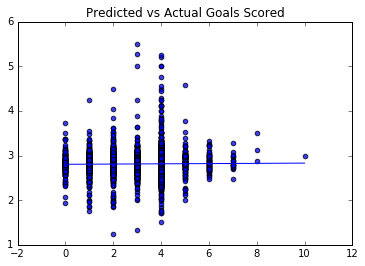

In [21]:
x = df_predicted_cleaned["Actual Score"]
y = df_predicted_cleaned["Predicted Score"]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
#colors = np.random.rand()
#area = (abs(df_predicted_cleaned["Actual Score"] - df_predicted_cleaned["Predicted Score"]))
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y, alpha=0.5)
plt.title("Predicted vs Actual Goals Scored")

plt.show()

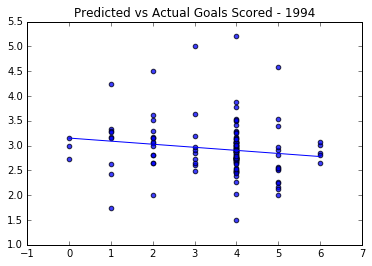

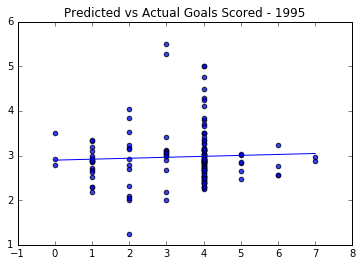

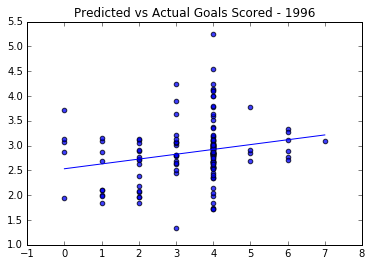

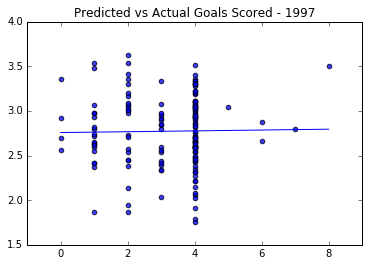

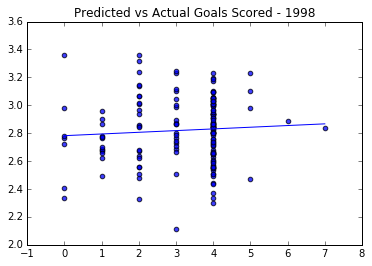

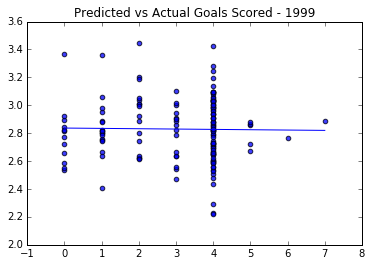

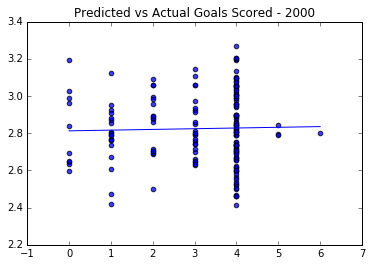

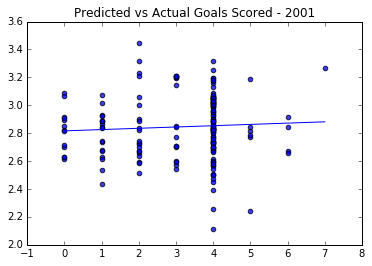

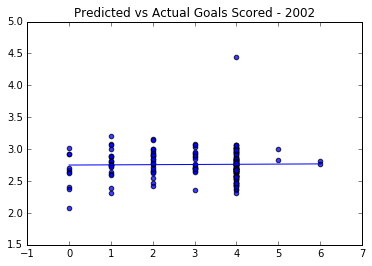

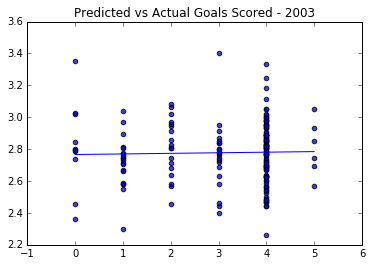

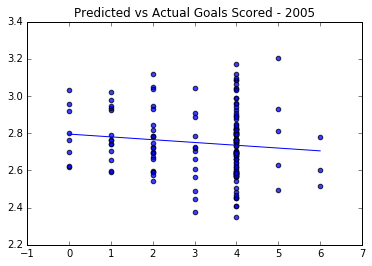

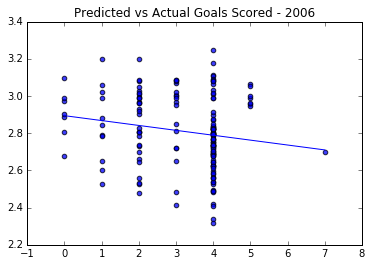

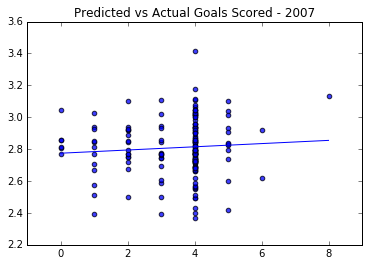

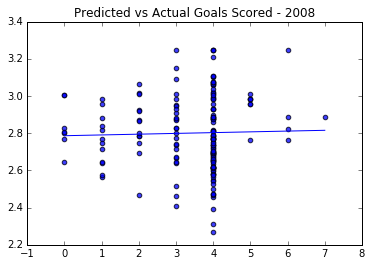

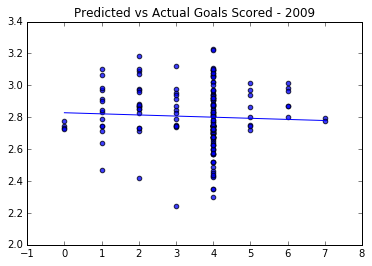

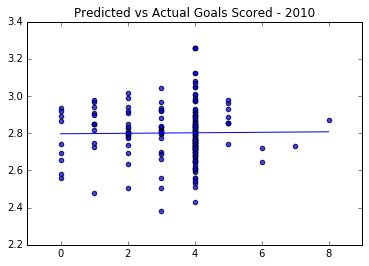

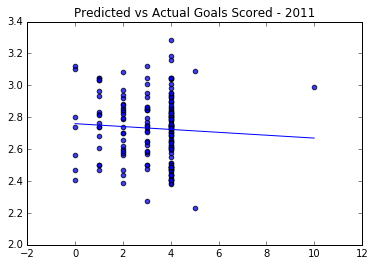

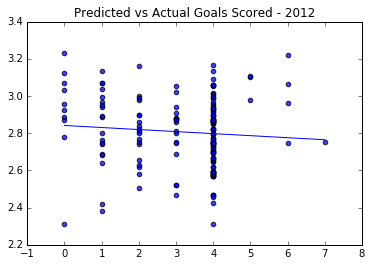

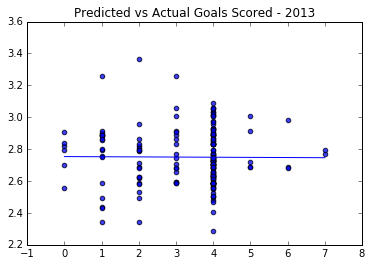

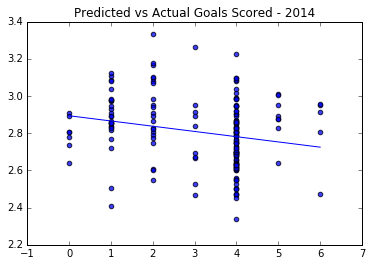

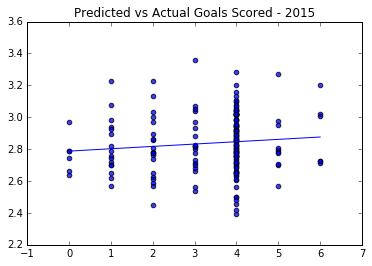

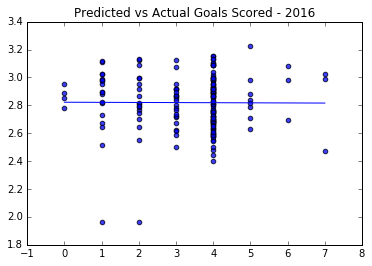

In [13]:
for i in range(1994, 2017):
    if i == 2004:
        continue
    
    x = df_predicted_cleaned["Actual Score"][i]
    y = df_predicted_cleaned["Predicted Score"][i]
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    #colors = np.random.rand()
    #area = (abs(df_predicted_cleaned["Actual Score"] - df_predicted_cleaned["Predicted Score"]))
    #plt.scatter(x, y, s=area, c=colors, alpha=0.5)
    plt.scatter(x, y, alpha=0.5)
    plt.title("Predicted vs Actual Goals Scored - {0}".format(i))

    plt.show()

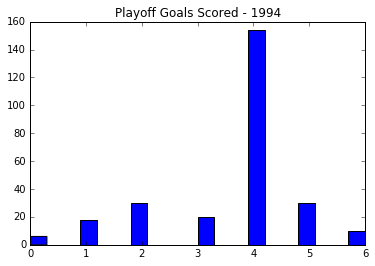

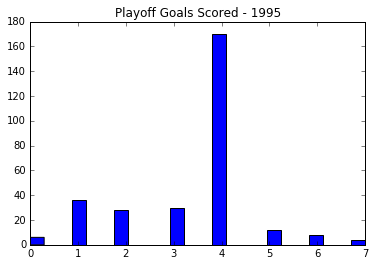

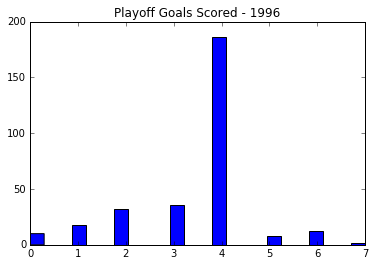

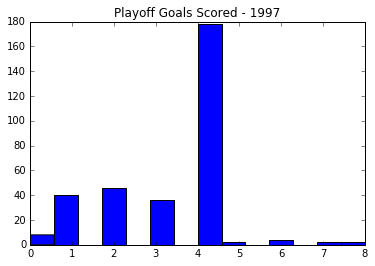

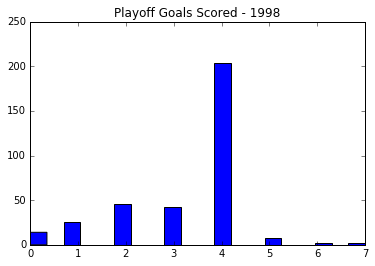

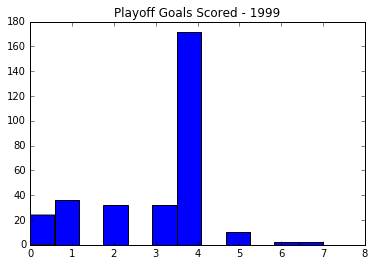

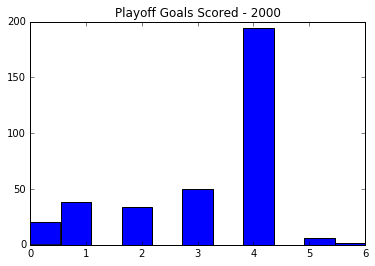

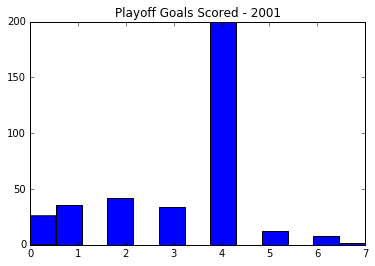

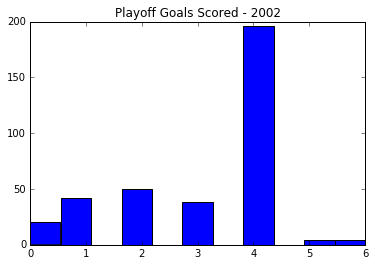

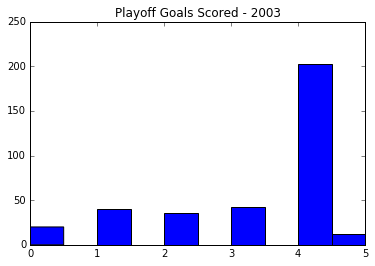

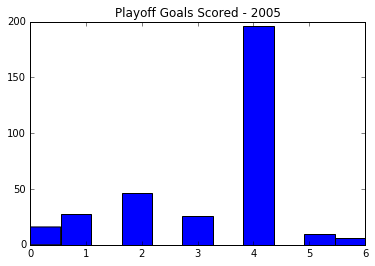

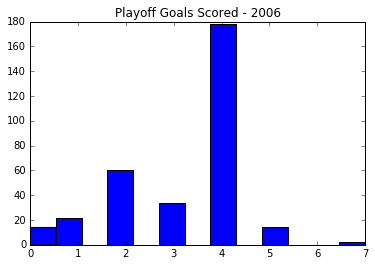

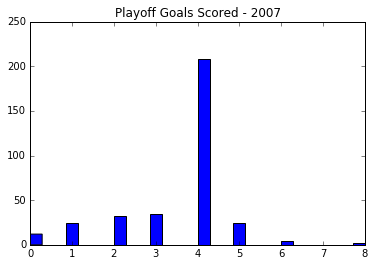

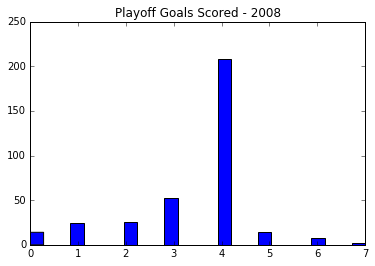

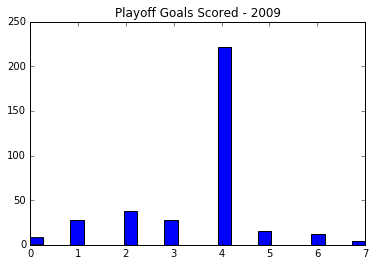

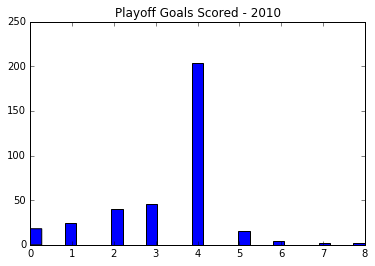

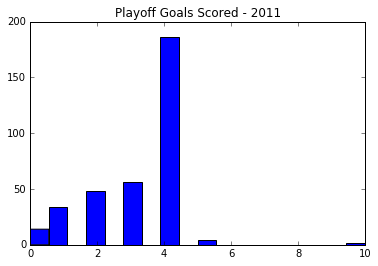

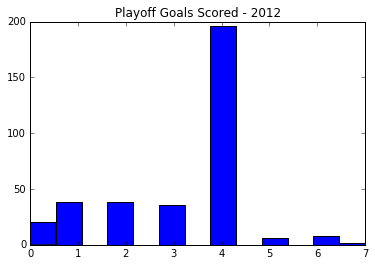

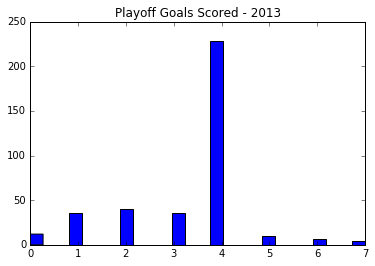

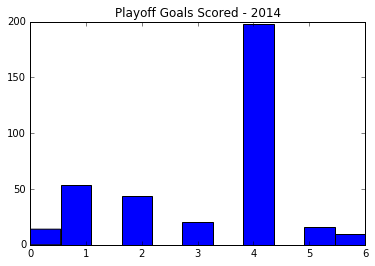

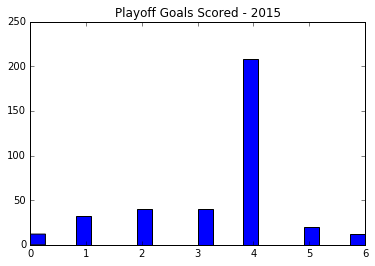

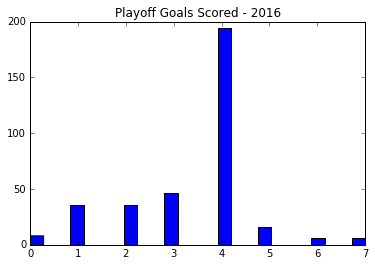

In [11]:
for i in range(1994, 2017):
    
    if i == 2004:
        continue
        
    rng = df_predicted_cleaned["Actual Score"][i]
    #a = np.hstack((rng.normal(size=1000), rng.normal(loc=5, scale=2, size=1000)))
    plt.hist(rng, bins="auto")  # arguments are passed to np.histogram
    plt.title("Playoff Goals Scored - {0}".format(i))
    plt.show()